# 기초통계 마지막 Mqin Quest 06
# 38 day / 120 day
# 구태훈
# 2024.07.16 10:20 ~ 5:40

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [250]:
#!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [251]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [252]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
dtypes: category(5), float32(1), float64(1), int32(1)
memory usage: 15.1 MB


## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. \
이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

- pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.

아래의 코드를 활용하세요.

```python
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)

# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()
```

In [254]:
# 주문 날짜 데이터 전처리

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# 데이터 타입 변경

df["Contry"] = df["Country"].astype(str)

# 주문 가격

df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Contry,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,United Kingdom,20.34


In [255]:
# 모집단의 기술 통계
population_mean = df["TotalPrice"].mean()
population_std = df["TotalPrice"].std()

# 무작위로 1000개의 표본 추출
sample = df.sample(n=1000, random_state=58)

sample100 = df.sample(n=100, random_state=58)

# 표본의 기술 통계
sample_mean = sample["TotalPrice"].mean()
sample_std = sample["TotalPrice"].std()
sample100_mean = sample100["TotalPrice"].mean()
sample100_std = sample100["TotalPrice"].std()

# 결과 출력
print(f"모집단의 평균: {population_mean}, 표준편차: {population_std}")
print(f"1000개 표본의 평균: {sample_mean}, 표준편차: {sample_std}")
print(f"100개 표본의 평균: {sample100_mean}, 표준편차: {sample100_std}")

모집단의 평균: 17.98779487699964, 표준편차: 378.8108235059747
1000개 표본의 평균: 17.32685, 표준편차: 50.87374572784946
100개 표본의 평균: 19.0463, 표준편차: 45.76705298243454


*  미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
* 모집단과 표본을 비교할 때 1000개와 100개로 표본을 두가지를 사용했습니다.
  * 100개일 때보다 1000개일 때 모집단의 평균값에 근접함이 보였습니다.
  * 모집단의 표준편차가 20배가 넘는 것으로 보아 전처리가 필요해보입니다.
  * 위를 통해 표본이 클수록 모집단의 평균에 가까워지는 중심극한정리를 알 수 있습니다.

In [256]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceMonth,TotalPrice
count,541909.000000,541909,541909.000000,406829.000000,541909.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.689453,7.553128,17.987795
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,1.000000,-168469.600000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,5.000000,3.400000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,8.000000,9.750000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,11.000000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,12.000000,168469.600000
std,218.081158,NaN,96.759853,1713.600342,3.509055,378.810824


In [257]:
sample.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceMonth,TotalPrice
count,1000.000000,1000,1000.000000,733.000000,1000.000000,1000.000000
mean,9.019000,2011-07-02 07:53:32.400000,4.641940,15370.413086,7.307000,17.326850
min,-72.000000,2010-12-01 12:22:00,0.000000,12354.000000,1.000000,-458.290000
25%,1.000000,2011-03-22 15:02:00,1.250000,14096.000000,4.000000,3.320000
50%,3.000000,2011-07-18 11:12:00,2.080000,15311.000000,8.000000,9.360000
75%,10.000000,2011-10-17 15:27:00,4.130000,16843.000000,11.000000,17.340000
max,360.000000,2011-12-09 11:34:00,458.290000,18287.000000,12.000000,979.200000
std,21.349202,NaN,24.008663,1651.538696,3.606627,50.873746


In [258]:
sample100.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceMonth,TotalPrice
count,100.000000,100,100.000000,74.000000,100.000000,100.000000
mean,11.630000,2011-06-22 17:30:34.800000,3.059000,15301.189453,6.800000,19.046300
min,-4.000000,2010-12-01 12:22:00,0.190000,12619.000000,1.000000,-5.000000
25%,1.000000,2011-03-07 08:59:45,1.630000,14122.250000,3.000000,3.360000
50%,3.000000,2011-07-11 02:05:30,2.460000,15158.000000,7.500000,8.285000
75%,8.000000,2011-10-03 01:13:00,4.130000,16716.250000,10.000000,16.625000
max,360.000000,2011-12-05 17:28:00,12.750000,18161.000000,12.000000,381.600000
std,39.156164,NaN,2.490012,1562.149292,3.741657,45.767053


## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

In [259]:
# 1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.

df[['Country', 'TotalPrice']].head()

,Country,TotalPrice
0,United Kingdom,15.30
1,United Kingdom,20.34
2,United Kingdom,22.00
3,United Kingdom,20.34
4,United Kingdom,20.34


In [260]:
# 2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.

# 국가별 주문 수 카운트
country_orders = df['Country'].value_counts()

# 상위 두 국가 선택
top_countries = country_orders.head(2).index
print("상위 두 국가:", country_orders.head(2))

상위 두 국가: Country
United Kingdom    495478
Germany             9495
Name: count, dtype: int64


In [261]:
# 3) 통계적 검증 수행하기
# 4) 각 국가의 'TotalPrice' 평균을 계산하세요.

# 각 국가의 TotalPrice 데이터 추출
country1_data = df[df['Country'] == top_countries[0]]['TotalPrice']
country2_data = df[df['Country'] == top_countries[1]]['TotalPrice']

# 각 국가의 TotalPrice 평균 계산
mean_country1 = country1_data.mean()
mean_country2 = country2_data.mean()

print(f"{top_countries[0]}의 TotalPrice 평균: {mean_country1:.2f}")
print(f"{top_countries[1]}의 TotalPrice 평균: {mean_country2:.2f}")


United Kingdom의 TotalPrice 평균: 16.53
Germany의 TotalPrice 평균: 23.35


In [262]:
# 5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.
#    이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다.
#    equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
# 6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

# 독립표본 t-검정 수행
t_statistic, p_value = ttest_ind(country1_data, country2_data, equal_var=False)

print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")


t-statistic: -10.0464
p-value: 0.0000


*미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.

* 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.
  * 'TotalPrice' 평균에 차이가 있습니다. 미션 1과 같이 무작위로 1000개의 표본을 추출하지 않고 진행했습니다.
  * 'United Kingdom'은 495,478개의 표본에서 평균이 16.53이고,
  * 'Germany'는 9,495개의 표본에서 23.35입니다.
  * 국가 간에 평균의 차이가 있습니다.

* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. t-통계량과 p-값을 해석하여 결과를 설명하세요.
  * t-통계량에서 -10.0464로 음수가 나온 것은 두 번째 집단인 'Germany'의 'TotalPrice' 값이 크다는 것을 알려줍니다.
  * 절대값이 10.0464인 것은 모집단의 평균의 차이보다 국가 간의 표본 평균간의 차이가 크다는 것을 알려줍니다.


* 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.
  * 1종 오류는 귀무가설이 실제로 참일 경우에도 잘못 기각하는 오류입니다. 유의수준(alpha)를 낮게 설정하면 오류를 줄일 수 있습니다.
  * 이 데이터셋에서 귀무가설은 "국가 간 'TotalPrice'에 차이가 없다." 입니다.
  * T-통계량인 국가간 'TotalPrice' 평균의 차이가 10만큼 있으므로  기무가설을 기각할 수 있습니다.
  * 또한 유의수준을 0.05로 설정해도 p-value가 0이므로 기각할 수 있습니다.
  * 이 데이터셋에서 귀무가설이 실제로 거짓이므로 1종 오류는 생길 수 없습니다.
  * 2종 오류는 귀무가설이 거짓일 때에 채택하는 오류입니다.
  * 이 데이터셋에서 귀무가설에 거짓임에도 참으로 잘못 결론 내리면 2종 오류에 해당합니다.


## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. \
다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

주중 기술통계:
count    477534.000000
mean          4.843425
std         103.032058
min      -11062.060000
25%           1.250000
50%           2.100000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64
Variance: 10615.604926596072

주말 기술통계:
count    64375.000000
mean         2.887824
std          7.959497
min          0.000000
25%          1.250000
50%          1.850000
75%          3.750000
max       1236.750000
Name: UnitPrice, dtype: float64
Variance: 63.35359866159967


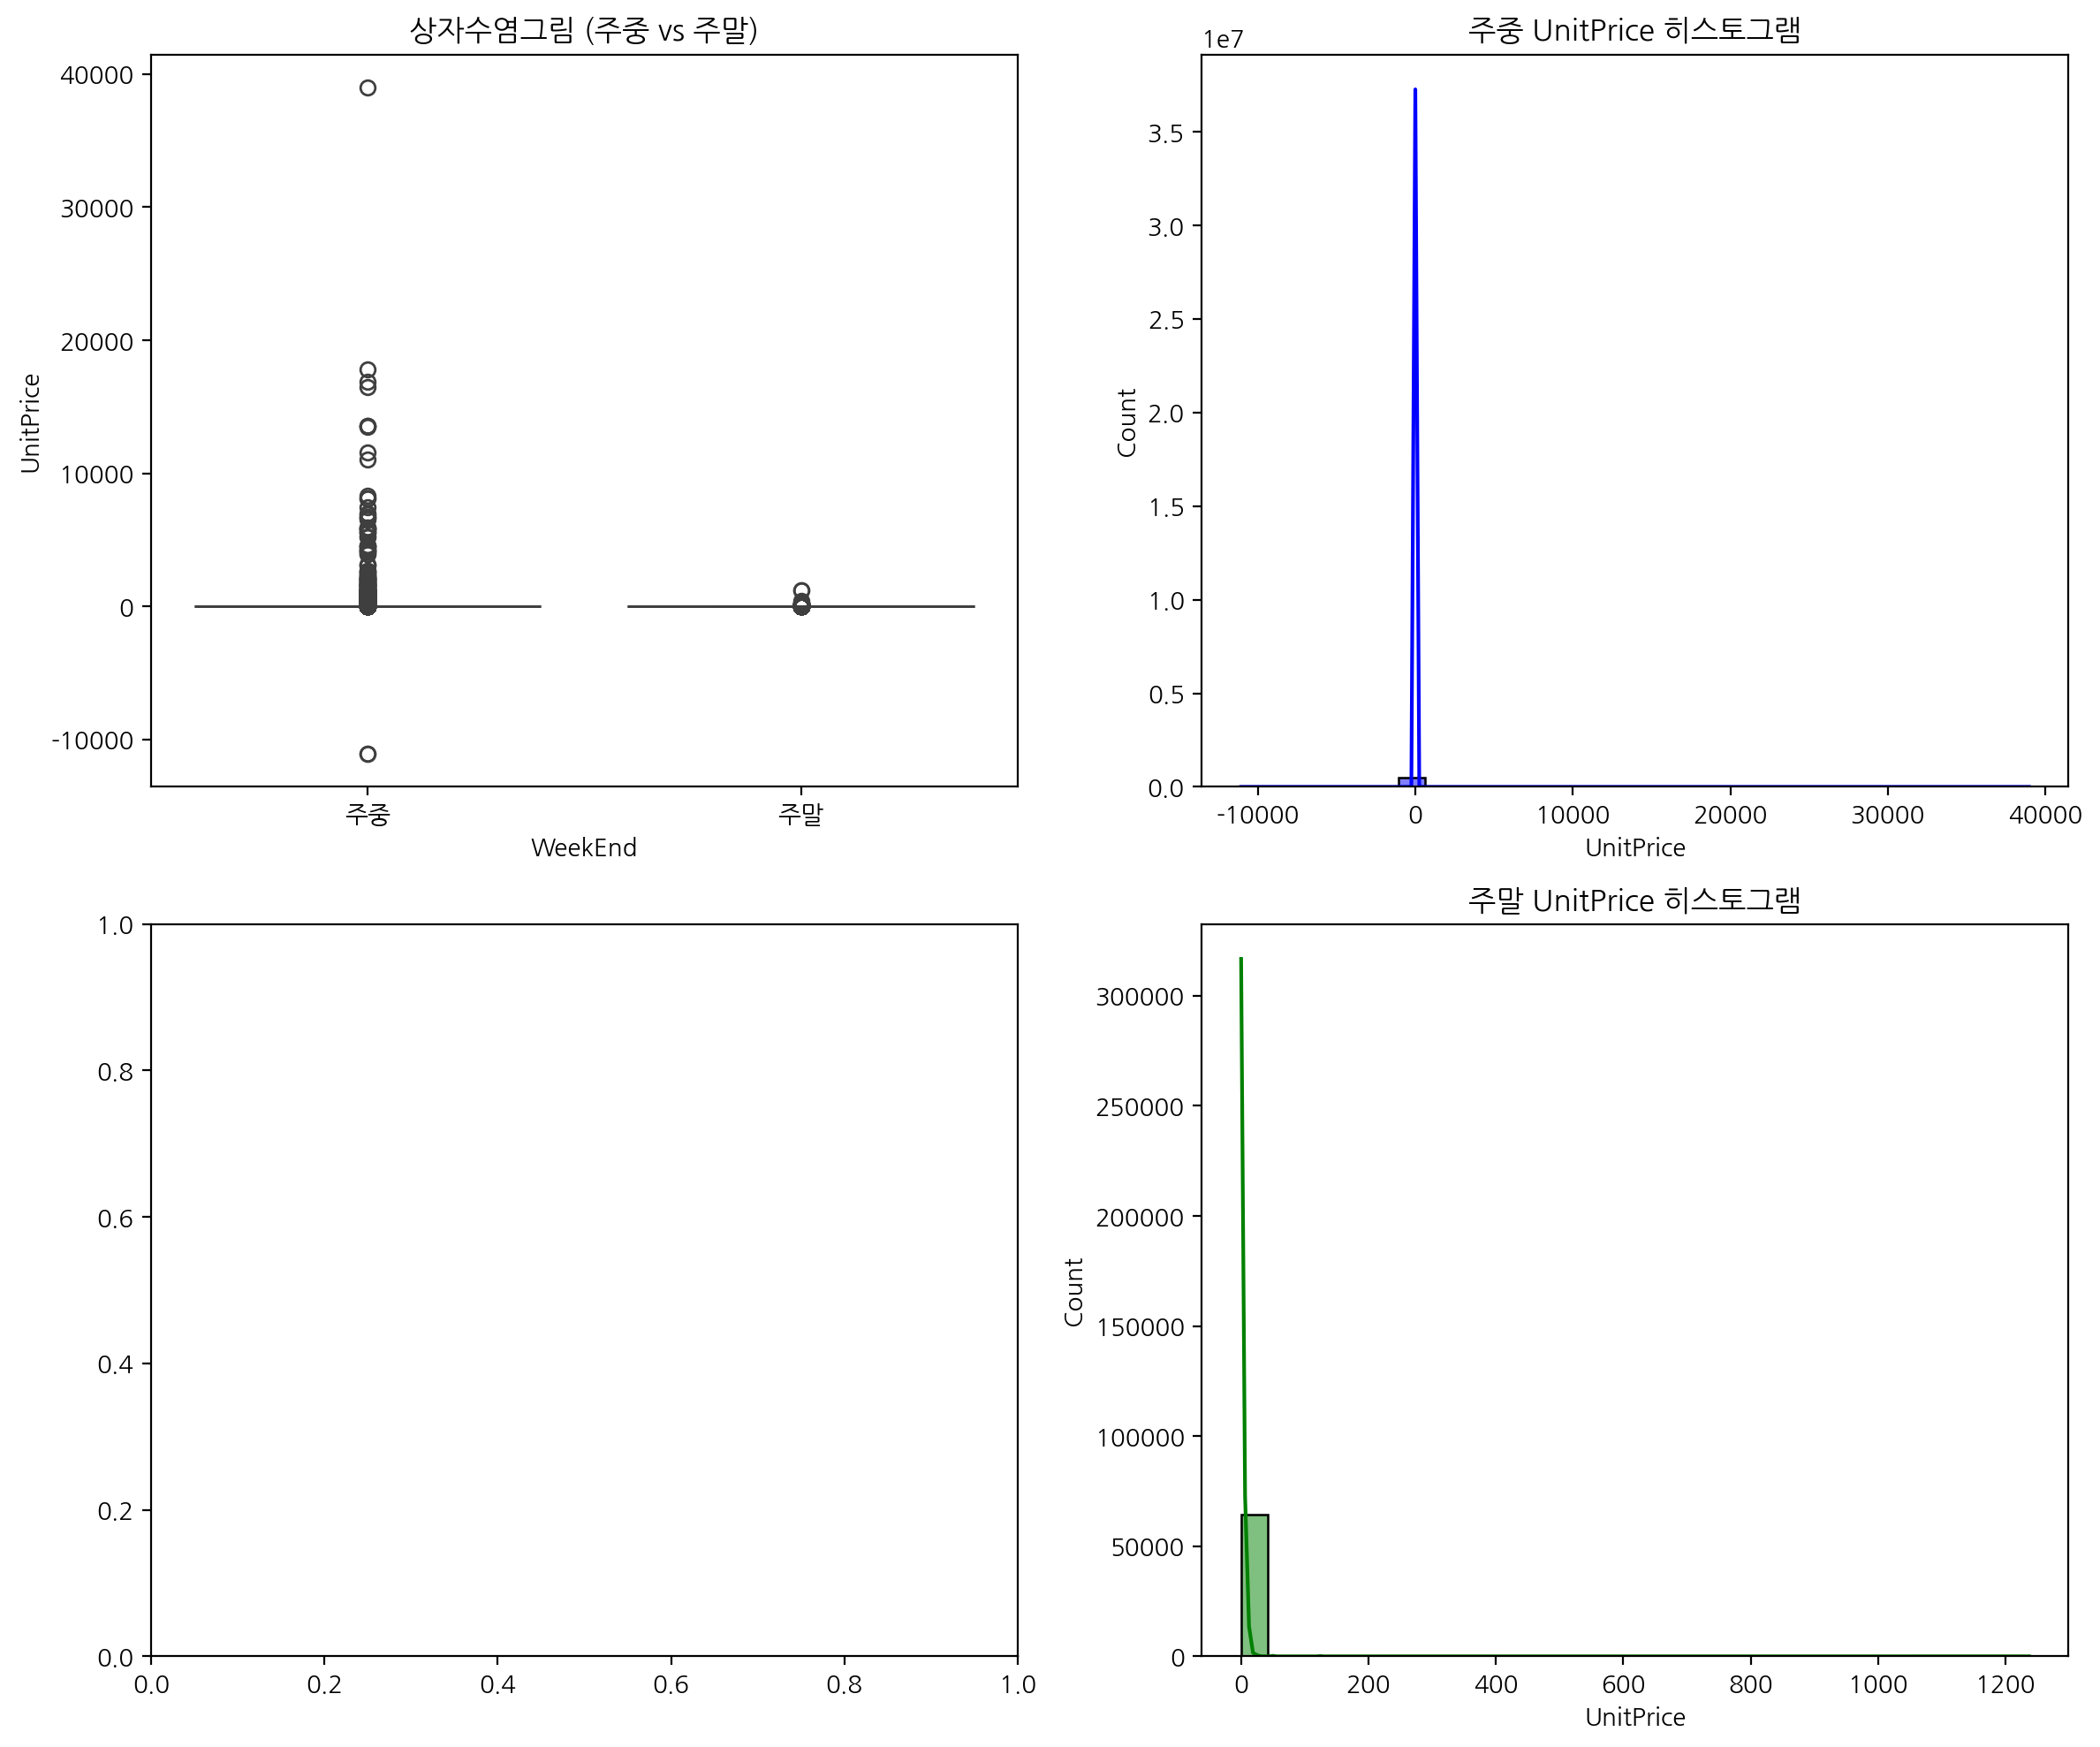

In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기 및 날짜 타입 변환
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 주중과 주말로 데이터 구분
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['WeekEnd'] = df['DayOfWeek'].apply(lambda x: '주말' if x > 4 else '주중')

# 주중과 주말 데이터 분리
weekday_data = df[df['WeekEnd'] == '주중']
weekend_data = df[df['WeekEnd'] == '주말']

# 기술통계와 분위수 계산
print("주중 기술통계:")
print(weekday_stats)
print("Variance:", weekday_data['UnitPrice'].var())
print("\n주말 기술통계:")
print(weekend_stats)
print("Variance:", weekend_data['UnitPrice'].var())


# 상자수염그림과 히스토그램 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(x='WeekEnd', y='UnitPrice', data=df, ax=axes[0, 0])
sns.histplot(weekday_data['UnitPrice'], bins=30, kde=True, ax=axes[0, 1], color='blue')
sns.histplot(weekend_data['UnitPrice'], bins=30, kde=True, ax=axes[1, 1], color='green')

axes[0, 0].set_title('상자수염그림 (주중 vs 주말)')
axes[0, 1].set_title('주중 UnitPrice 히스토그램')
axes[1, 1].set_title('주말 UnitPrice 히스토그램')

plt.tight_layout()
plt.show()


* 'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요.
  * 상자수염그림으로 주중에 'UnitPrice' 값이 대체로 높고 다양하게 분포됨을 알 수 있습니다.
  * 주중에 'UnitPrice' 값이 10000 이하에 많이 분포하고 10000~20000에도 분포함을 알 수 있습니다.
  * 40000 과 -10000 근처의 이상치가 눈에 띕니다.
  * 주말에 'UnitPrice' 값은 작은 값으로 작은 빈도로 분포함을 알 수 있습니다.

* 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요.
  * 데이터의 수가 주중에 477,534건, 주말에 64,375건으로 7.4배 가까이 주중이 많습니다.
* 분위수는 25%, 50%, 75% 순서대로 보면
  * 주중에 1.25, 2.1, 4.1이고,
  * 주말에 1.25, 1.85, 3.75입니다.
  * 25%가 동일하고 50%와 75% 데이터가 주중이 높게 분포합니다.
* 중심경향치를 평균과 중간값으로 보면
  * 주중이 4.84, 2.1이고 주말이 2.89, 1.85이고,
  * 주중 평균이 1.7배 높고, 중간값이 1.1배 높습니다.
* 변산성을 표준편차와 분산으로 보면
  * 주중이 103.03, 10615.60이고
  * 주말이 7.96, 63.35입니다.
  * 주중의 'UnitPrice' 값이 다양하게 분포함을 알 수 있습니다.


## 미션4) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
이를 이용해 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```

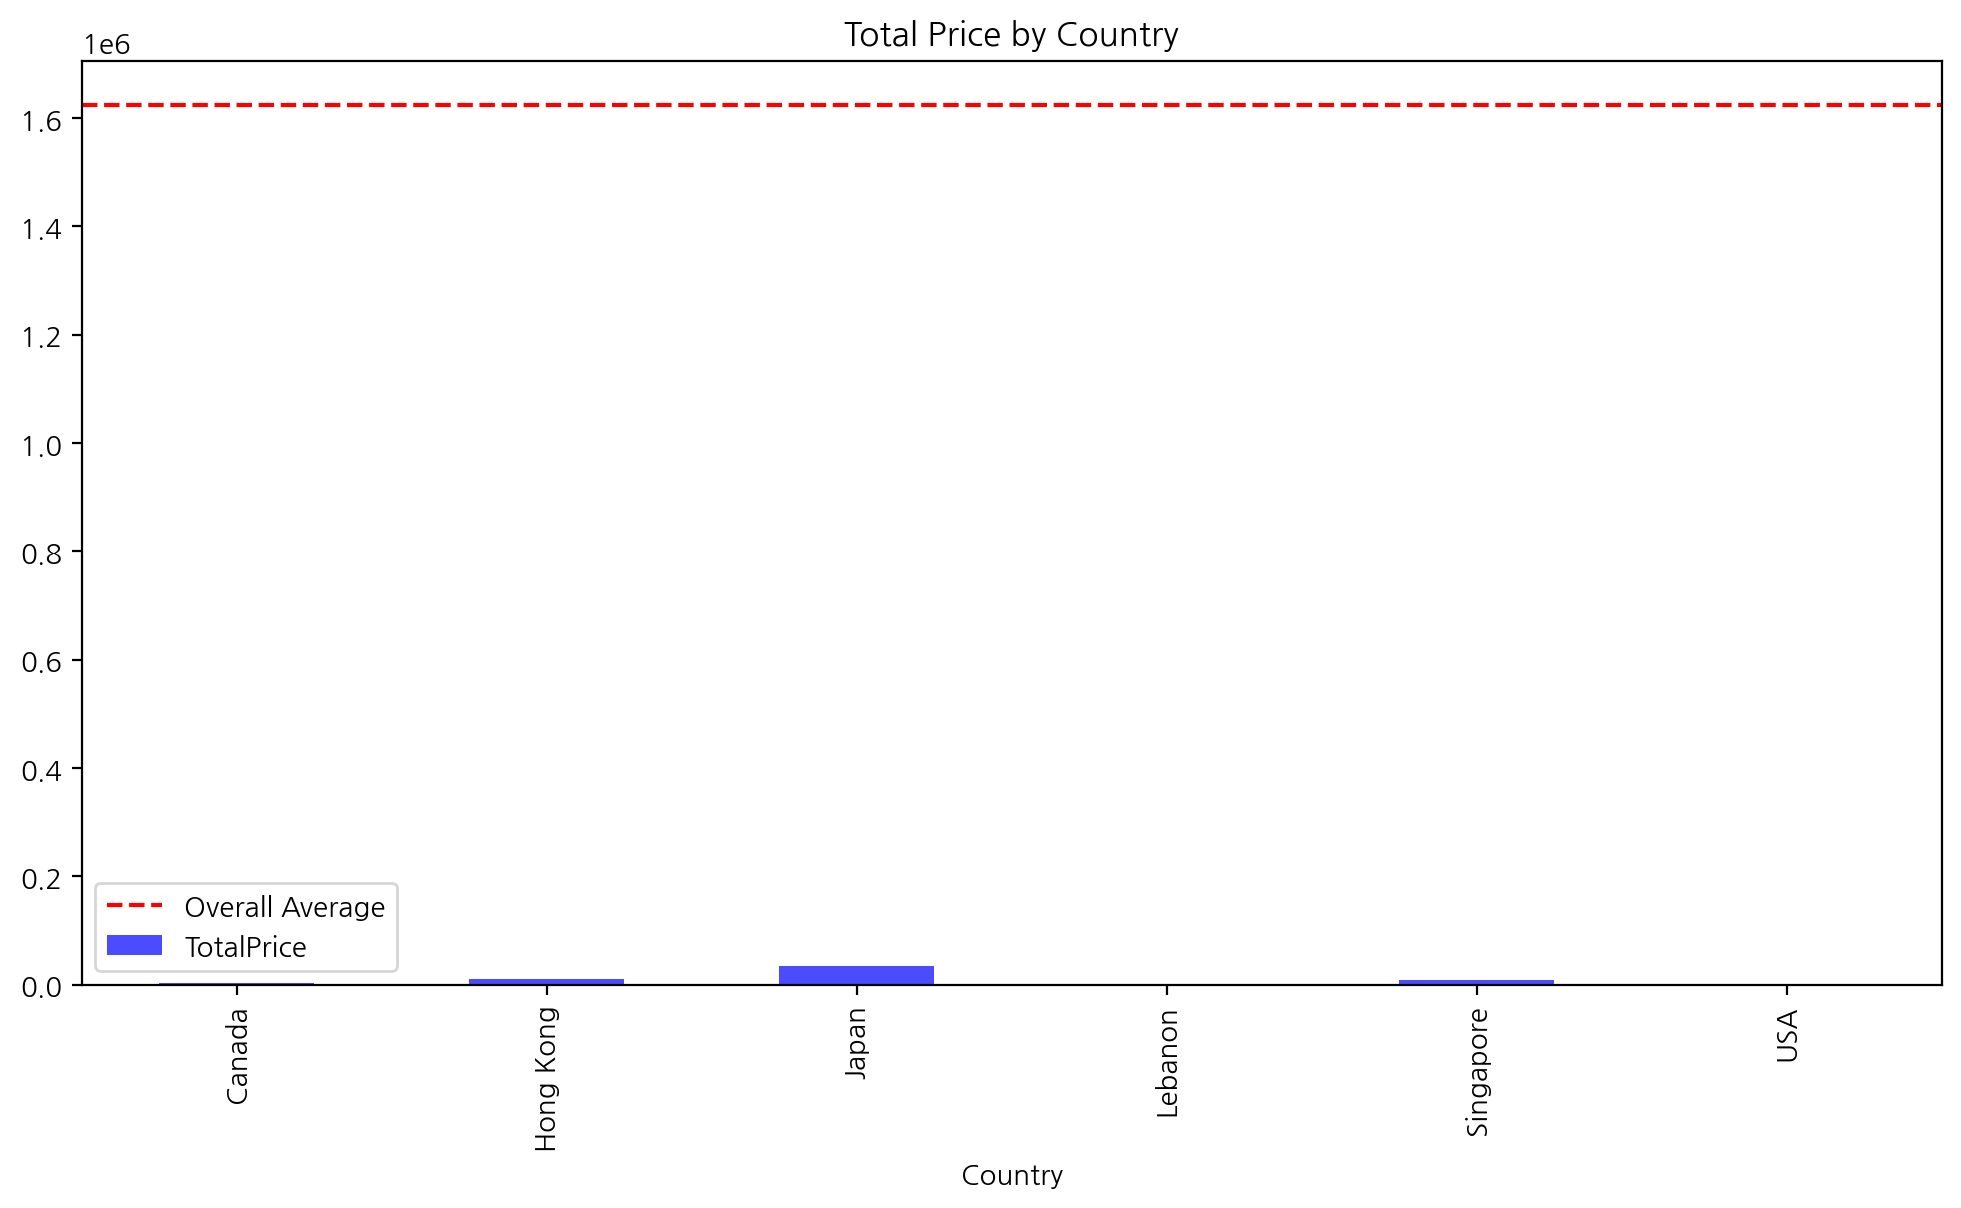

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# 데이터 로드
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")

# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)

# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# 특정 국가로 하위 그룹 설정
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]

# 하위 그룹의 추세 분석
group_data = df[df["Country"].isin(country_group)]

# 각 하위 그룹의 총 판매금액 추세
group_total_price = group_data.groupby("Country")["TotalPrice"].sum()

# 전체 데이터의 총 판매금액 추세
overall_total_price = df["TotalPrice"].sum()

# 시각화
plt.figure(figsize=(12, 6))
group_total_price.plot(kind='bar', color='blue', alpha=0.7)
plt.axhline(y=overall_total_price/len(country_group), color='red', linestyle='--', label='Overall Average')
plt.title('Total Price by Country')
plt.legend()
plt.show()

# 심슨의 역설 설명
# 특정 국가들에서는 높은 판매금액을 보이지만, 전체 데이터에서는 이와 다른 추세를 보일 수 있습니다.
# 이는 데이터가 각 국가별로 상이한 분포나 크기를 가질 수 있기 때문입니다.


* 작성한 해당 6개국과 전체 데이터 셋을 작성한 코드가 손실되었습니다.

* 제시된 6국가와 전체 국가의 날짜별 총 판매액을 비교했습니다.
  * 각 나라의 매출액과 전체 매출액이 비슷한 추세도 있지만 시기에 따라 특별한 국가의 매출에 의해 크게 차이가 나는 때가 있습니다.
  * 예상되는 것은 국경일과 문화의 차이가 있다고 추정이 되며 가설을 세울 수 있겠습니다. 기타 다양한 차이가 모여 전체 데이터와 국가별 데이터가 일관성 없이 나타날 수 있겠습니다.
* 비즈니스적으로 국가별 매출 차이가 도드라지는 것이 발견이 될 수 있습니다.
  * 2011년 1, 3, 12월은 일본의 매출이 전체 국가 매출액과 같습니다.
  * 일본을 제외한 국가에서 주말에 구매가 잘 일어나지 않는 것처럼 국가 단위로 구매가 일어나지 않는 시기라면 불필요한 마케팅과 비용을 줄일 수 있겠습니다. 2011년 4월과 10월처럼 일본도 판매가 극히 드문 시기도 마찬가지 입니다.

## 미션5) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.\
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalPrice)을 종속변수로 설정하여 회귀분석을 수행합니다.\
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

In [265]:
import statsmodels.api as sm

# 필요한 컬럼만 추출하고 결측치 제거
df = df[['UnitPrice', 'Quantity']]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# 결측치 제거
df.dropna(inplace=True)

# 이상값 제거 (UnitPrice가 0 이상)
df = df[df['UnitPrice'] > 0]


# 회귀분석 모델 구축
X = df['UnitPrice']
y = df['TotalPrice']
X = sm.add_constant(X)  # 상수항 추가

model = sm.OLS(y, X).fit()  # OLS 모델 적합

# 모델 요약 결과 출력
print(model.summary())

<ipython-input-265-89a03f348a28>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
<ipython-input-265-89a03f348a28>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


                            OLS Regression Results                            
Dep. Variable:             TotalPrice   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                 1.786e+04
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:57:43   Log-Likelihood:            -3.9594e+06
No. Observations:              539392   AIC:                         7.919e+06
Df Residuals:                  539390   BIC:                         7.919e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.4654      0.508     42.217      0.0

미션5) 상품의 단가와 총 판매액의 관계를 분석해 주세요.
상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다. 높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalPrice)을 종속변수로 설정하여 회귀분석을 수행합니다.
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.
* 결측치를 제거하고, 'UnitPrice'가 음수인 이상값을 제거합니다.

2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalPrice)을 종속변수로 설정하여 회귀분석을 수행합니다.
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.
* 회귀계수(coef)를 통해 단가가 총 판매액에 미치는 영향을 나타냅니다.
  * 'const' 상수항이 0일 때(단가가 0일 때) 총 판매액이 45.69로 예상됩니다.
  * 'UnitPrice'가 단가가 1단위 증가할 때마다 총 판매액은 -0.0139로 감소합니다. 통계적으로 의미가 없는 계수입니다. p-value가 0.668로 뒷받침합니다.
* 결정계수(R-squared)로 데이터의 변동성을 잘 설명하는지 나타냅니다. 0에서 1사이의 값으로 높으면 모델의 설명력이 높습니다.
  * R-squared 값이 0.000 값이 나오므로 데이터의 변동성을 설명하지 못합니다.
  * 단가가 총 판매액의 변동을 설명하지 못합니다.
  * 조정된 R-squared 값도 -0.001로 데이터의 변동성을 거의 설명하지 못합니다.
* 결론
  * 가설에서 설정한 회귀계수에 의해 단가와 총 판매액의 양의 상관관계는 없습니다.
  * 회귀계수가 -0.0139로 약한 음의 상관관계처럼 보이나 p-value가 0.668로 통계적으로 유의미하지 않고 우연의 결과일 수 있습니다.
  * 결정계수 값에 의해 단가가 총 판매액의 변동성을 설명하지 못합니다.
  * 위의 회귀 분석으로 판매를 위해 단가 설정을 할 때 높은 단가가 총 판매액을 높이는데 의미가 없음을 알 수 있습니다.


## 미션6) 여러 분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


```python
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= "2010-12-17") & (df_promotion["InvoiceDate"] <= "2010-12-24")
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

In [266]:
import pandas as pd

# 데이터 불러오기
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")

# InvoiceDate를 datetime 타입으로 변환
df['InvoiceDate'] = df['InvoiceDate'].cat.codes
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 데이터 타입 변환 후 확인
print("New InvoiceDate data type:", df['InvoiceDate'].dtype)

# 2011년 이전 데이터만 사용
df_promotion = df[(df["InvoiceDate"] < pd.Timestamp("2011-01-01")) & df["Description"].notnull()].dropna().copy()

# 크리스마스 기간 플래그 및 관련 상품 플래그 생성
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= pd.Timestamp("2010-12-17")) & (df_promotion["InvoiceDate"] <= pd.Timestamp("2010-12-24"))
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")

# 주문 가격 계산
df_promotion['TotalPrice'] = df_promotion['Quantity'] * df_promotion['UnitPrice']


New InvoiceDate data type: datetime64[ns]


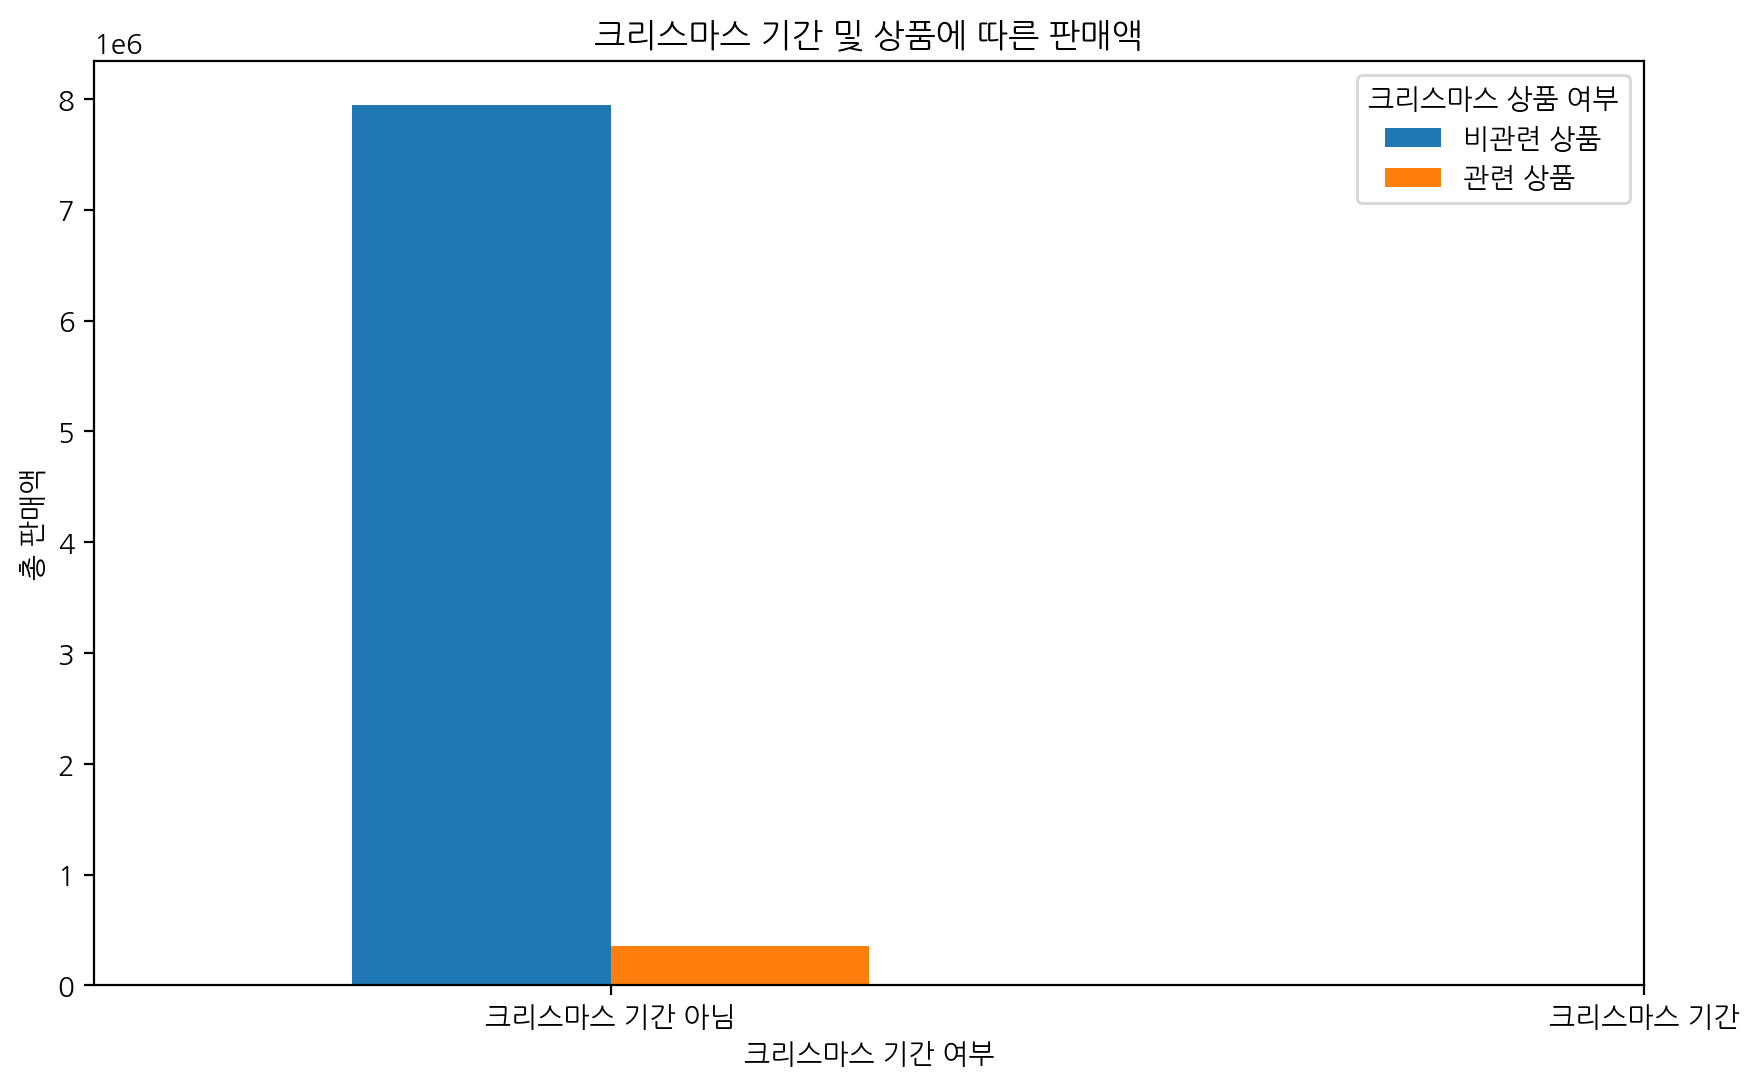

In [267]:

# 크리스마스 기간과 상품에 따른 판매량 분석
christmas_period_sales = df_promotion.groupby(["IsChristmasPeriod", "IsChristmasProduct"])["TotalPrice"].sum().unstack()

# 시각화
fig, ax = plt.subplots(figsize=(10, 6))
christmas_period_sales.plot(kind='bar', ax=ax)
ax.set_title('크리스마스 기간 및 상품에 따른 판매액')
ax.set_xlabel('크리스마스 기간 여부')
ax.set_ylabel('총 판매액')
ax.set_xticks([0, 1])
ax.set_xticklabels(['크리스마스 기간 아님', '크리스마스 기간'], rotation=0)
ax.legend(title='크리스마스 상품 여부', labels=['비관련 상품', '관련 상품'])
plt.show()


* 크리스마스 상품 프로모션 전략
 * 크리스마스 기간동안 특별 프로모션을 실시해서 관련 상품을 촉진시킵니다.
* 고객 세분화
 * 크리스마스 상품에 관심 높은 고객 세그먼트를 찾아 맞춤 마케팅을 합니다.
* 재고 및 공급망 관리
 * 시즌동안 수요 증가를 대비해 재고를 적절히 유지하고 공급망을 효율화해서 비용을 줄이고 고객 만족도를 높입니다.
* 상품 다양화
 * 크리스마스 외의 다른 시즌 상품을 보고 다양화합니다. 안정적인 매출을 유지하는데 도움이 됩니다.

## 미션7) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.

```python
from statsmodels.formula.api import ols

# ols.summary()를 이용해 볼 수 있습니다.
```

In [268]:
from statsmodels.formula.api import ols

# 데이터 불러오기
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")


# InvoiceDate를 datetime 타입으로 변환
df['InvoiceDate'] = df['InvoiceDate'].cat.codes
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 데이터 타입 변환 후 확인
print("New InvoiceDate data type:", df['InvoiceDate'].dtype)

# 2011년 이전 데이터 필터링
# df = df[df['InvoiceDate'] < '2011-01-01']

# 필요한 데이터만 추출
df = df[(df['InvoiceDate'] < pd.Timestamp('2011-01-01')) & df['Description'].notnull()]


New InvoiceDate data type: datetime64[ns]


In [269]:

# 크리스마스 기간 여부 설정
df['IsChristmasPeriod'] = ((df['InvoiceDate'] >= pd.Timestamp('2010-12-17')) &
                           (df['InvoiceDate'] <= pd.Timestamp('2010-12-24'))).astype(int)

# 크리스마스 관련 상품 여부 설정, 결측치를 False로 채우고 정수형으로 변환
df['IsChristmasProduct'] = df['Description'].str.lower().str.contains('christmas').fillna(False).astype(int)

# 결측치 제거
df.dropna(subset=['Quantity', 'UnitPrice', 'Country'], inplace=True)

# 다변량 선형 회귀모델 구축
model = ols('Quantity ~ IsChristmasProduct + UnitPrice + C(Country)', data=df).fit()

# 모델 요약 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     12.14
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           5.53e-76
Time:                        08:57:51   Log-Likelihood:            -3.6767e+06
No. Observations:              540455   AIC:                         7.354e+06
Df Residuals:                  540415   BIC:                         7.354e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
  * 'IsChristmasProduct' 계수가 3.2149입니다.
  * 양수인 것이 크리스마스 관련 상품이 더 많이 판매된다는 것을 의미합니다.
  * 'UnitPrice' 계수가 -0.0028입니다.
  * 가격이 높아질수록 판매량의 변화를 나타냅니다.
  * 여기서는 높은 가격이 판매량의 감소를 의미합니다.
  * 'C(Country)'는 국가별 판매량의 차이를 나타냅니다.
  * 해당 국가의 회귀계수가 양수이면 크리스마스 상품이 국가의 판매량을 증가시키는 방향으로 작용합니다.

* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
  * 회귀계수가 양수인 나라에서 크리스마스 기간 동안 크리스마스 상품의 판매가 증가하고, 단가가 높을수록 판매가 늘어납니다.
  * 해당 국가의 소비자는 크리스마스 상품에 수요가 많고, 비싸도 많은 소비자가 구매합니다.
  * 음수인 나라에서는 크리스마스 기간에 크리스마스 상품의 판매가 감소하고, 단가가 높을수록 판매가 더 줄어듭니다.
  * 해당 국가의 소비자는 크리스마스 상품에 수요가 적거나, 가격이 높으면 구매를 꺼립니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
  * 국가별 모델 결과에 따라 크리스마스 상품의 판매를 촉진하는 프로모션을 강화할 수 있습니다. 특정 국가의 높은 판매량을 통해 다른 시장에 적용할 수 있습니다.
  * 'UnitPrice'의 영향에 따라 가격이 민감한지를 확인하고 가격인하와 가격인상을 할 수 있습니다.


## 미션8) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.\
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.\
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩 등을 사용할 수 있습니다.\
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\
5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.

In [270]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 데이터 불러오기
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")

# 날짜 타입 변환과 데이터 필터링
# InvoiceDate를 datetime 타입으로 변환
df['InvoiceDate'] = df['InvoiceDate'].cat.codes
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df[(df['InvoiceDate'] < '2011-01-01') & df['Description'].notnull()]

# 타겟 변수 생성
df['Purchased'] = (df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER').astype(int)

# 특성 선택
features = df[['UnitPrice', 'Quantity', 'CustomerID', 'Country']].dropna()

# 타겟 데이터 인덱싱 조정
target = df.loc[features.index, 'Purchased']

# 범주형 변수 원-핫 인코딩
encoder = OneHotEncoder(sparse_output=False)
features_encoded = encoder.fit_transform(features[['Country']])
features_encoded_df = pd.DataFrame(features_encoded, columns=encoder.get_feature_names_out(['Country']))

# 숫자 특성과 범주형 특성 결합
features_final = pd.concat([features.drop('Country', axis=1).reset_index(drop=True), features_encoded_df], axis=1)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features_final, target, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     80936
           1       0.00      0.00      0.00       430

    accuracy                           0.99     81366
   macro avg       0.50      0.50      0.50     81366
weighted avg       0.99      0.99      0.99     81366

[[80936     0]
 [  430     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* 고객의 특정 상품 구매 예측 보고서
  * 목적 : 'WHITE HANGING HEART T-LIGHT HOLDER' 상품의 구매 가능성을 예측해서 타겟 마케팅 전략과 재고 관리 최적화를 돕는 이진 분류 모델을 구축합니다.
  * 모델 성능 정확도 99%(0 클래스)
  * 모델이 0 클래스로 구매하지 않을 것을 정확하게 예측했습니다.
  * 모델이 1 클래스로 구매 예측은 하지 못했습니다.
  * 클래스의 불균형으로 인한 결과로 예상됩니다.
  * 이 모델은 특정 상품의 미구매 예측에 유효합니다.
  * 구매 예측을 위해 모델의 개선이 필요합니다.